In [1]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from timebudget import timebudget

from cplAE_MET.utils.load_config import load_config
from cplAE_MET.utils.dataset import MET_exc_inh

from cplAE_MET.models.subnetworks_M import AE_M
from cplAE_MET.models.subnetworks_E import AE_E
from cplAE_MET.models.subnetworks_ME import AE_ME_int
from cplAE_MET.models.subnetworks_T import AE_T
from cplAE_MET.models.torch_utils import MET_dataset, min_var_loss
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dir_pth = load_config('config.toml')
dat = MET_exc_inh.from_file(dir_pth['MET_data'])
train_ind, val_ind = dat.train_val_split(fold=0, n_folds=10, seed=0)
train_dat = dat[train_ind,:]
val_dat = dat[val_ind,:]

In [3]:
train_dataset = MET_dataset(train_dat, device=device)
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True, drop_last=True)

val_dataset = MET_dataset(val_dat, device=device)
val_dataloader = DataLoader(train_dataset, batch_size=len(val_dataset), shuffle=False)

dataset = MET_dataset(dat, device=device)
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

In [4]:
with timebudget('dataloading for 1 training epoch'):
    for batch in iter(train_dataloader):
        pass

dataloading for 1 training epoch took 1.389sec


In [5]:
from itertools import chain

# Model init -----------
model_config = dict(latent_dim=2,
                    batch_size=1000,
                    T=dict(dropout_p=0.2),
                    E=dict(gnoise_std_frac=0.05,
                           dropout_p=0.2))
ae_t = AE_T(config=model_config)
ae_e = AE_E(config=model_config, gnoise_std=train_dataset.gnoise_std)
ae_m = AE_M(config=model_config)

ae_t.to(device)
ae_m.to(device)
ae_e.to(device)

optimizer = torch.optim.Adam(chain(ae_e.parameters(),ae_m.parameters(), ae_t.parameters()), lr=0.001)

In [6]:
def plot_z(zm,ze,zt,dat,xlim=(-5,5),ylim=(-5,5)):
    tonumpy = lambda x:x.detach().to('cpu').numpy()
    zt = tonumpy(zt)
    ze = tonumpy(ze)
    zm = tonumpy(zm)
    f,ax = plt.subplots(1,3, figsize=(6,2))
    ax[0].scatter(zm[:,0],zm[:,1],c=dat.cluster_color,s=1)
    ax[0].set(title='M')
    ax[1].scatter(ze[:,0],ze[:,1],c=dat.cluster_color,s=1)
    ax[1].set(title='E')
    ax[2].scatter(zt[:,0],zt[:,1],c=dat.cluster_color,s=1)
    ax[2].set(title='T')
    for a in ax: a.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.show()

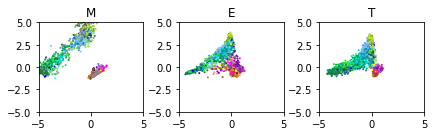

epoch: 99 loss: 5.07741 loss_rec_t: 3.93222 loss_rec_e: 0.16589 loss_rec_m: 0.18737 loss_cpl_me: 0.98523 loss_cpl_mt: 0.57071 loss_cpl_te: 0.22121 


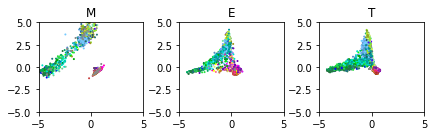

epoch: 199 loss: 4.63763 loss_rec_t: 3.76192 loss_rec_e: 0.15551 loss_rec_m: 0.16386 loss_cpl_me: 0.61897 loss_cpl_mt: 0.33514 loss_cpl_te: 0.22119 


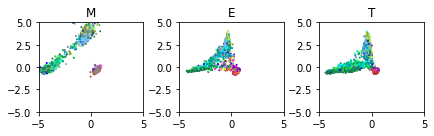

epoch: 299 loss: 4.16038 loss_rec_t: 3.48176 loss_rec_e: 0.15013 loss_rec_m: 0.15615 loss_cpl_me: 0.45167 loss_cpl_mt: 0.19620 loss_cpl_te: 0.17613 


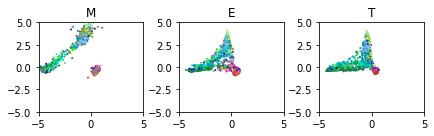

epoch: 399 loss: 4.00341 loss_rec_t: 3.43576 loss_rec_e: 0.14101 loss_rec_m: 0.14807 loss_cpl_me: 0.38293 loss_cpl_mt: 0.17148 loss_cpl_te: 0.10709 


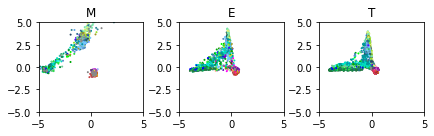

epoch: 499 loss: 3.94987 loss_rec_t: 3.38606 loss_rec_e: 0.13082 loss_rec_m: 0.14661 loss_cpl_me: 0.38241 loss_cpl_mt: 0.17288 loss_cpl_te: 0.11349 


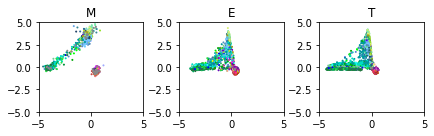

epoch: 599 loss: 3.77680 loss_rec_t: 3.34151 loss_rec_e: 0.12649 loss_rec_m: 0.13364 loss_cpl_me: 0.16666 loss_cpl_mt: 0.07904 loss_cpl_te: 0.09612 


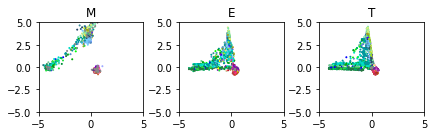

epoch: 699 loss: 3.77884 loss_rec_t: 3.26694 loss_rec_e: 0.13211 loss_rec_m: 0.11955 loss_cpl_me: 0.28854 loss_cpl_mt: 0.17685 loss_cpl_te: 0.08339 


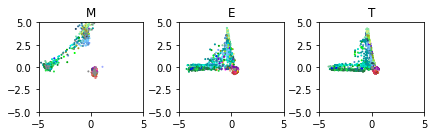

epoch: 799 loss: 3.80722 loss_rec_t: 3.27182 loss_rec_e: 0.12879 loss_rec_m: 0.14972 loss_cpl_me: 0.28393 loss_cpl_mt: 0.16597 loss_cpl_te: 0.09092 


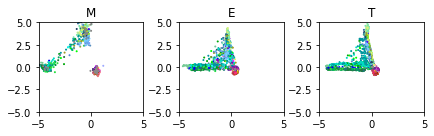

epoch: 899 loss: 3.79260 loss_rec_t: 3.21180 loss_rec_e: 0.12808 loss_rec_m: 0.13367 loss_cpl_me: 0.37201 loss_cpl_mt: 0.16982 loss_cpl_te: 0.14924 


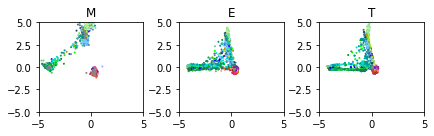

epoch: 999 loss: 3.56480 loss_rec_t: 3.17823 loss_rec_e: 0.11895 loss_rec_m: 0.13044 loss_cpl_me: 0.13758 loss_cpl_mt: 0.04658 loss_cpl_te: 0.09061 


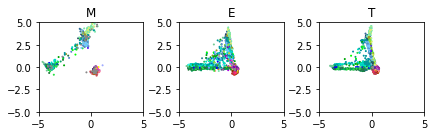

epoch: 1099 loss: 3.66039 loss_rec_t: 3.15482 loss_rec_e: 0.12048 loss_rec_m: 0.14546 loss_cpl_me: 0.20978 loss_cpl_mt: 0.09045 loss_cpl_te: 0.14918 


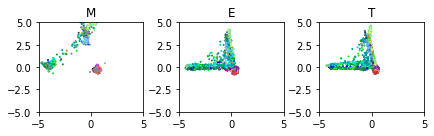

epoch: 1199 loss: 3.54246 loss_rec_t: 3.14082 loss_rec_e: 0.11489 loss_rec_m: 0.13439 loss_cpl_me: 0.17257 loss_cpl_mt: 0.08570 loss_cpl_te: 0.06665 


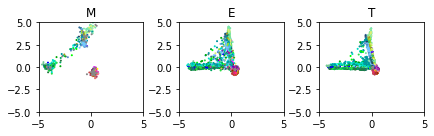

epoch: 1299 loss: 3.53460 loss_rec_t: 3.07605 loss_rec_e: 0.11986 loss_rec_m: 0.14050 loss_cpl_me: 0.19206 loss_cpl_mt: 0.13758 loss_cpl_te: 0.06061 


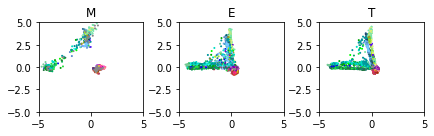

epoch: 1399 loss: 3.43760 loss_rec_t: 3.07090 loss_rec_e: 0.11324 loss_rec_m: 0.13717 loss_cpl_me: 0.12757 loss_cpl_mt: 0.04809 loss_cpl_te: 0.06820 


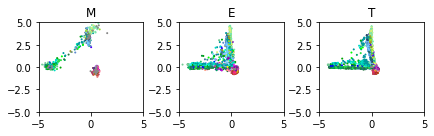

epoch: 1499 loss: 3.46860 loss_rec_t: 3.04323 loss_rec_e: 0.11839 loss_rec_m: 0.13313 loss_cpl_me: 0.18567 loss_cpl_mt: 0.12296 loss_cpl_te: 0.05089 


In [7]:
for epoch in range(0,1500,1):
    for step, batch in enumerate(iter(train_dataloader)):
        xm=batch['xm']
        xsd=batch['xsd']
        xe=batch['xe']
        xt=batch['xt']
        valid_xm=batch['valid_xm']
        valid_xsd=batch['valid_xsd']
        valid_xe=batch['valid_xe']
        valid_xt=batch['valid_xt']
        is_m_1d=batch['is_m_1d']
        is_e_1d=batch['is_e_1d']
        is_t_1d=batch['is_t_1d']
        is_me_1d=batch['is_me_1d']
        is_met_1d=batch['is_met_1d']
        
        optimizer.zero_grad()

        _, zm, _, xrm, xrsd = ae_m(xm, xsd)
        _, ze, _, xre = ae_e(xe)
        zt, xrt = ae_t(xt)

        # reconstruction losses
        loss_rec_t = torch.mean(torch.masked_select(torch.square(xt-xrt), valid_xt))
        loss_rec_e = torch.mean(torch.masked_select(torch.square(xe-xre), valid_xe))
        loss_rec_m = torch.mean(torch.masked_select(torch.square(xm-xrm), valid_xm))
        loss_rec_sd = torch.mean(torch.masked_select(torch.square(xsd-xrsd), valid_xsd))

        # calculate coupling only on met cells
        zm_is_met = zm[is_met_1d,...]
        ze_is_met = ze[is_met_1d,...]
        zt_is_met = zt[is_met_1d,...]

        loss_cpl_me = min_var_loss(zm_is_met, ze_is_met)
        loss_cpl_mt = min_var_loss(zm_is_met, zt_is_met)
        loss_cpl_te = min_var_loss(zt_is_met, ze_is_met)

        loss = loss_rec_t + loss_rec_e + loss_rec_m + 0*loss_rec_sd \
            + 0*loss_cpl_me + loss_cpl_mt + loss_cpl_te

        loss.backward()
        optimizer.step()


        if (((epoch+1) % 100) == 0) & (step == 0):

            with torch.no_grad():
                dataset = next(iter(dataloader))
                ae_m.eval()
                ae_e.eval()
                ae_t.eval()
                _, zm, _, xrm, xrsd = ae_m(dataset['xm'], dataset['xsd'])
                _, ze, _, xre = ae_e(dataset['xe'])
                zt, xrt = ae_t(dataset['xt'])
                ae_m.train()
                ae_e.train()
                ae_t.train()
                plot_z(zm,ze,zt,dat)


            tonumpy = lambda x:x.detach().to('cpu').numpy()
            print(f'epoch: {epoch} loss: {tonumpy(loss):0.5f} ' \
                + f'loss_rec_t: {tonumpy(loss_rec_t):0.5f} ' \
                + f'loss_rec_e: {tonumpy(loss_rec_e):0.5f} ' \
                + f'loss_rec_m: {tonumpy(loss_rec_m):0.5f} ' \
                + f'loss_cpl_me: {tonumpy(loss_cpl_me):0.5f} ' \
                + f'loss_cpl_mt: {tonumpy(loss_cpl_mt):0.5f} ' \
                + f'loss_cpl_te: {tonumpy(loss_cpl_te):0.5f} ')

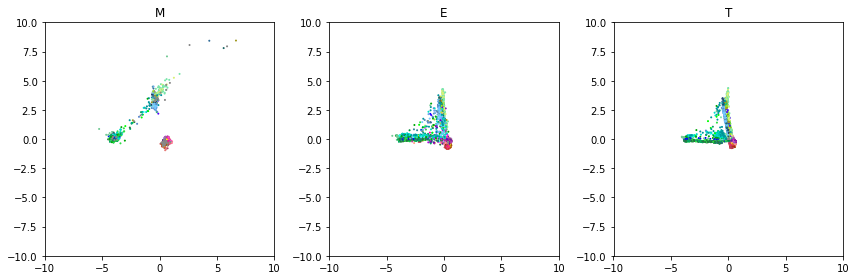

In [8]:
with torch.no_grad():
    dataset = next(iter(dataloader))
    ae_m.eval()
    ae_e.eval()
    ae_t.eval()
    _, zm, _, xrm, xrsd = ae_m(dataset['xm'], dataset['xsd'])
    _, ze, _, xre = ae_e(dataset['xe'])
    zt, xrt = ae_t(dataset['xt'])
    ae_m.train()
    ae_e.train()
    ae_t.train()

def plot_z(zm,ze,zt,dat,xlim=(-5,5),ylim=(-5,5)):
    tonumpy = lambda x:x.detach().to('cpu').numpy()
    zt = tonumpy(zt)
    ze = tonumpy(ze)
    zm = tonumpy(zm)
    f,ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].scatter(zm[:,0],zm[:,1],c=dat.cluster_color,s=1)
    ax[0].set(title='M')
    ax[1].scatter(ze[:,0],ze[:,1],c=dat.cluster_color,s=1)
    ax[1].set(title='E')
    ax[2].scatter(zt[:,0],zt[:,1],c=dat.cluster_color,s=1)
    ax[2].set(title='T')
    for a in ax: a.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.show()

plot_z(zm,ze,zt,dat,xlim=(-10,10),ylim=(-10,10))

In [9]:
zt = tonumpy(zt)
ze = tonumpy(ze)
zm = tonumpy(zm)
df = pd.DataFrame(dict(ze0=ze[:, 0], ze1=ze[:, 1],
                       zm0=zm[:, 0], zm1=zm[:, 1],
                       zt0=zt[:, 0], zt1=zt[:, 1],
                       paired=np.logical_and(dat.isM_1d, dat.isT_1d),
                       color=dat.cluster_color,
                       id=dat.specimen_id,
                       cluster=dat.cluster_label))

In [10]:
fig = px.scatter(df,
                 x="zm0", y="zm1", color="paired",
                 hover_data=["id", "cluster"],
                 color_discrete_map=dict(zip(df.cluster, df.color)),
                 range_x=(-2.5,10),
                 range_y=(-10,2.5),
                 width=600,height=400)
fig.show()

fig = px.scatter(df,
                 x="ze0", y="ze1", color="paired",
                 hover_data=["id", "cluster"],
                 color_discrete_map=dict(zip(df.cluster, df.color)),
                 range_x=(-2.5,10),
                 range_y=(-10,2.5),
                 width=600,height=400)
fig.show()

fig = px.scatter(df,
                 x="zt0", y="zt1", color="paired",
                 hover_data=["id", "cluster"],
                 color_discrete_map=dict(zip(df.cluster, df.color)),
                 range_x=(-2.5,10),
                 range_y=(-10,2.5),
                 width=600,height=400)
fig.show()